In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/twitter.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-twitter.csv', index=False)
test.to_csv('test-twitter.csv', index=False)

In [5]:
train_df = pd.read_csv("train-twitter.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,0,@jshe Will check out your latest post shortly ...
1,1,"Went for a nice drive with my mom today, now g..."
2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,0,@djallday unfortunately not
4,1,@rustyrockets russel can you tweet telling eve...
...,...,...
18423,0,@Zombi3Kill3r I might be getting one from some...
18424,1,Jiou dee chiou!!!!!
18425,0,@honeymunchkin My anger is getting bigger for ...
18426,0,I just ate KFC


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_21156\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'@jshe Will check out your latest post shortly doing paperwork.  At school.  On Sunday.   Been here 4 hours already. '

In [8]:
test_df = pd.read_csv("test-twitter.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(2047, 2)

In [10]:
test_df.head()

,sentiment,review
0,1,@_CINNA_ ben chillin all day
1,0,@andrewsayer I miss that shopping center. Bris...
2,0,I am really ill..x And i hve missed 2 days of...
3,1,@Portuguesinha I usually make sure you aren't ...
4,1,@DonnieWahlberg Havin fun in Vegas yet? . Just...


In [11]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,sentiment,review
0,0,@jshe Will check out your latest post shortly ...
1,1,"Went for a nice drive with my mom today, now g..."
2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,0,@djallday unfortunately not
4,1,@rustyrockets russel can you tweet telling eve...
5,0,another long day tomorrow
6,1,garrett bestest buddy's party was crackin' ! ...
7,0,When your iPod shuffles on to 'Daddy's Gone' o...
8,0,@bellamami09 - hummm not feeling the love
9,1,@tillmanas goooood times do it on sunday or s...


In [12]:
test_df.head()

,sentiment,review
0,1,@_CINNA_ ben chillin all day
1,0,@andrewsayer I miss that shopping center. Bris...
2,0,I am really ill..x And i hve missed 2 days of...
3,1,@Portuguesinha I usually make sure you aren't ...
4,1,@DonnieWahlberg Havin fun in Vegas yet? . Just...


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,@jshe Will check out your latest post shortly ...
1,1,1,"Went for a nice drive with my mom today, now g..."
2,2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,3,0,@djallday unfortunately not
4,4,1,@rustyrockets russel can you tweet telling eve...


In [14]:
train_df_bert

,id,label,sentence
0,0,0,@jshe Will check out your latest post shortly ...
1,1,1,"Went for a nice drive with my mom today, now g..."
2,2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,3,0,@djallday unfortunately not
4,4,1,@rustyrockets russel can you tweet telling eve...
...,...,...,...
18423,18423,0,@Zombi3Kill3r I might be getting one from some...
18424,18424,1,Jiou dee chiou!!!!!
18425,18425,0,@honeymunchkin My anger is getting bigger for ...
18426,18426,0,I just ate KFC


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,0,@jshe Will check out your latest post shortly ...
1,1,1,"Went for a nice drive with my mom today, now g..."
2,2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,3,0,@djallday unfortunately not
4,4,1,@rustyrockets russel can you tweet telling eve...
...,...,...,...
9995,9995,0,I just found a massive hole in my shoe BOOOO
9996,9996,0,@DavidArchie Aww. I wanna watch the UP too! W...
9997,9997,0,my blackberry is on its last leg
9998,9998,0,@Fitat31 I am so sorry for your loss.


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,@_CINNA_ ben chillin all day
1,1,0,@andrewsayer I miss that shopping center. Bris...
2,2,0,I am really ill..x And i hve missed 2 days of...
3,3,1,@Portuguesinha I usually make sure you aren't ...
4,4,1,@DonnieWahlberg Havin fun in Vegas yet? . Just...


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,1,@_CINNA_ ben chillin all day
1,1,0,@andrewsayer I miss that shopping center. Bris...
2,2,0,I am really ill..x And i hve missed 2 days of...
3,3,1,@Portuguesinha I usually make sure you aren't ...
4,4,1,@DonnieWahlberg Havin fun in Vegas yet? . Just...
...,...,...,...
2042,2042,0,@EmVee1 is this for me??
2043,2043,1,"@ashleyisrad YESSSS if i could get in, you ca..."
2044,2044,0,@SammyClaire There's a parade for the Lakers a...
2045,2045,0,had a greay day with my family...missing my cu...


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  Went for a nice drive with my mom today, now getting ready to go out with my sexy man for his b-day 
Tokenized:  ['went', 'for', 'a', 'nice', 'drive', 'with', 'my', 'mom', 'today', ',', 'now', 'getting', 'ready', 'to', 'go', 'out', 'with', 'my', 'sexy', 'man', 'for', 'his', 'b', '-', 'day']
Token IDs:  [2253, 2005, 1037, 3835, 3298, 2007, 2026, 3566, 2651, 1010, 2085, 2893, 3201, 2000, 2175, 2041, 2007, 2026, 7916, 2158, 2005, 2010, 1038, 1011, 2154]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  84


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  80


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  @jshe Will check out your latest post shortly doing paperwork.  At school.  On Sunday.   Been here 4 hours already. 
Token IDs: tensor([  101,  1030,  1046,  4095,  2063,  2097,  4638,  2041,  2115,  6745,
         2695,  3859,  2725, 17397,  1012,  2012,  2082,  1012,  2006,  4465,
         1012,  2042,  2182,  1018,  2847,  2525,  1012,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [27]:

train_df_bert.head()

,id,label,sentence
0,0,0,@jshe Will check out your latest post shortly ...
1,1,1,"Went for a nice drive with my mom today, now g..."
2,2,1,@colocelt Ah nice to meet you Eric @eSquared82...
3,3,0,@djallday unfortunately not
4,4,1,@rustyrockets russel can you tweet telling eve...


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (2047, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [33]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#regularise = tensorflow.keras.regularizers.l2(0.001)
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(Dense(8,activation='relu',kernel_regularizer=regularise))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 3

In [34]:
nb_classes

2

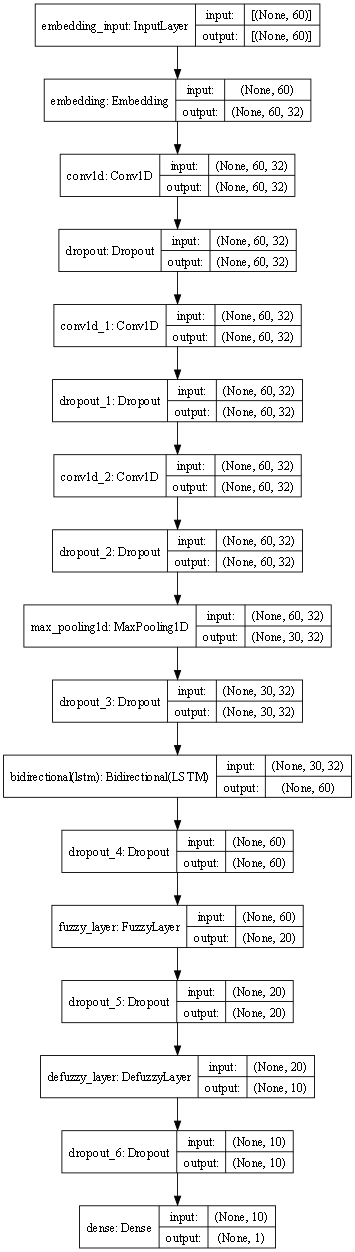

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [36]:
import numpy as np
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 18s 14ms/step - loss: 0.6545 - accuracy: 0.5923 - val_loss: 0.5658 - val_accuracy: 0.7140
Epoch 2/20
900/900 [==============================] - 12s 14ms/step - loss: 0.5180 - accuracy: 0.7613 - val_loss: 0.5368 - val_accuracy: 0.7350
Epoch 3/20
900/900 [==============================] - 12s 13ms/step - loss: 0.4388 - accuracy: 0.8093 - val_loss: 0.5773 - val_accuracy: 0.7340
Epoch 4/20
900/900 [==============================] - 12s 13ms/step - loss: 0.3896 - accuracy: 0.8389 - val_loss: 0.5973 - val_accuracy: 0.7220
Epoch 5/20
313/313 [==============================] - 3s 6ms/step - loss: 0.2815 - accuracy: 0.8940
Training Accuracy: 0.894000
Training Loss: 0.281543
64/64 [==============================] - 1s 8ms/step - loss: 0.6109 - accuracy: 0.7592
Testing Accuracy:  0.759160
Testing Loss:  0.610902


In [65]:
import numpy as np
y_pred = model.predict(x_test)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

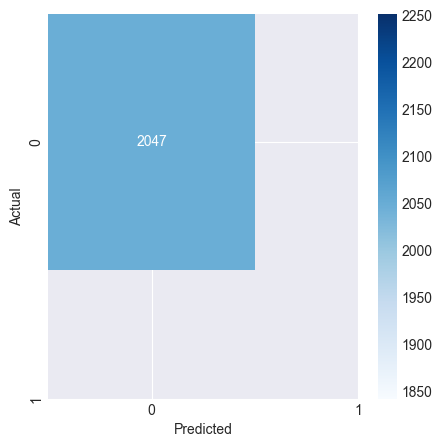

In [67]:
import seaborn as sn
labels=['0', '1']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

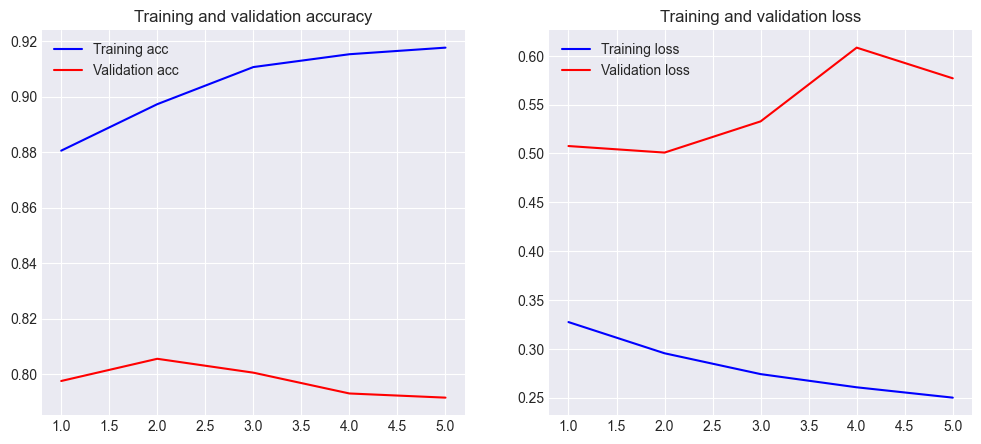

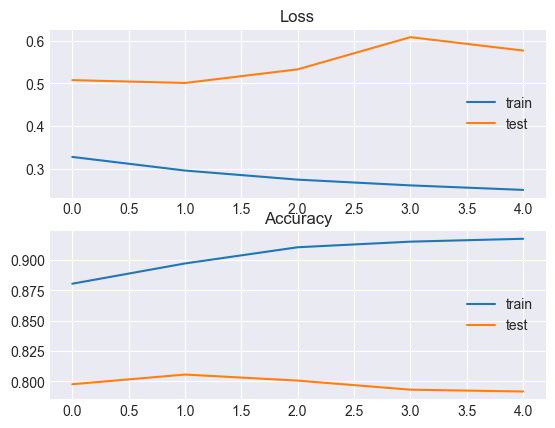

In [68]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()